In [1]:
import pixelator

import os
from pathlib import Path

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from pixelator.plot import molecule_rank_plot, cell_count_plot, scatter_umi_per_upia_vs_tau
from pixelator import simple_aggregate


In [3]:
DATA_DIR = Path('./datasets')

baseurl = "https://pixelgen-technologies-datasets.s3.eu-north-1.amazonaws.com/mpx-datasets/pixelator/0.18.x/technote-v1-vs-v2-immunology-II"

# !curl -L -O -C - --create-dirs --output-dir {DATA_DIR} "{baseurl}/Sample05_V2_PBMC_r1.layout.dataset.pxl"
# !curl -L -O -C - --create-dirs --output-dir {DATA_DIR} "{baseurl}/Sample06_V2_PBMC_r2.layout.dataset.pxl"
# !curl -L -O -C - --create-dirs --output-dir {DATA_DIR} "{baseurl}/Sample07_V2_PHA_PBMC_r1.layout.dataset.pxl"
# !curl -L -O -C - --create-dirs --output-dir {DATA_DIR} "{baseurl}/Sample08_V2_PHA_PBMC_r2.layout.dataset.pxl"

paths = [
    DATA_DIR / "Sample05_V2_PBMC_r1.layout.dataset.pxl",
    DATA_DIR / "Sample06_V2_PBMC_r2.layout.dataset.pxl",
    # DATA_DIR / "Sample07_V2_PHA_PBMC_r1.layout.dataset.pxl",
    # DATA_DIR / "Sample08_V2_PHA_PBMC_r2.layout.dataset.pxl",
]

names = [ "resting_r1", 
         "resting_r2", 
        #  "stimulated_r1", 
        #  "stimulated_r2"
        ]

pg_data_combined = simple_aggregate(
    names, [pixelator.read(path) for path in paths]
)
pg_data_combined

/home/eitan/miniconda3/envs/pixelgen-vi/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_elem from `anndata.experimental` is deprecated. Import anndata.io.read_elem instead.
  warnings.warn(msg, FutureWarning)
/home/eitan/miniconda3/envs/pixelgen-vi/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_elem from `anndata.experimental` is deprecated. Import anndata.io.read_elem instead.
  warnings.warn(msg, FutureWarning)
/home/eitan/miniconda3/envs/pixelgen-vi/lib/python3.10/site-packages/pixelator/pixeldataset/precomputed_layouts.py:350: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  missing_markers = all_markers - set(lazyframe.columns)


: 

In [2]:
# Setup
DATA_DIR = Path('./datasets')

# Dataset: https://software.pixelgen.com/datasets/technote-mpx-v1-vs-v2
# PBMC cells extracted from a healthy volunteer. Half were fixed and half were stimulated into PHA blasts ("activation". in this state the cells rapidly divide).


# We use only the V2 non stimulated cells
FILENAMES = [
    "Sample05_V2_PBMC_r1.layout.dataset.pxl",
    "Sample06_V2_PBMC_r2.layout.dataset.pxl",
]

COMBINED_FILENAME = "combined_resting_data.pxl"

combined_path = DATA_DIR / COMBINED_FILENAME
# if os.path.exists(combined_path):
#     pg_data = pixelator.read(combined_path)
baseurl = "https://pixelgen-technologies-datasets.s3.eu-north-1.amazonaws.com/mpx-datasets/pixelator/0.18.x/technote-v1-vs-v2-immunology-II"
for filename in FILENAMES:
    !curl -L -O -C - --create-dirs --output-dir {DATA_DIR} "{baseurl}/{filename}"

# pg_data = pixelator.simple_aggregate(
#     ["resting_r1", "resting_r2", ], [pixelator.read(DATA_DIR / filename) for filename in FILENAMES]
# )
# pg_data.save(combined_path, force_overwrite=True)

# Sample 1 of the V2 kit (non stimulated cells)
pg_data = pixelator.read(DATA_DIR / "Sample05_V2_PBMC_r1.layout.dataset.pxl")
pg_data.adata.obs['sample'] = 'resting_r1'
adata = pg_data.adata


** Resuming transfer from byte position 969731508
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

/home/eitan/miniconda3/envs/pixelgen-vi/lib/python3.10/pty.py:89: RuntimeWarning: Using fork() can cause Polars to deadlock in the child process.
In addition, using fork() with Python in general is a recipe for mysterious
deadlocks and crashes.

The most likely reason you are seeing this error is because you are using the
multiprocessing module on Linux, which uses fork() by default. This will be
fixed in Python 3.14. Until then, you want to use the "spawn" context instead.

See https://docs.pola.rs/user-guide/misc/multiprocessing/ for details.

If you really know what your doing, you can silence this warning with the warning module
or by setting POLARS_ALLOW_FORKING_THREAD=1.

  pid, fd = os.forkpty()


  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
** Resuming transfer from byte position 980053164
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0


/home/eitan/miniconda3/envs/pixelgen-vi/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_elem from `anndata.experimental` is deprecated. Import anndata.io.read_elem instead.
  warnings.warn(msg, FutureWarning)


In [3]:
print(pg_data.adata)
print(pg_data.adata.X)

AnnData object with n_obs × n_vars = 1125 × 84
    obs: 'pixels', 'a_pixels', 'b_pixels', 'antibodies', 'molecules', 'reads', 'mean_reads_per_molecule', 'median_reads_per_molecule', 'mean_b_pixels_per_a_pixel', 'median_b_pixels_per_a_pixel', 'mean_a_pixels_per_b_pixel', 'median_a_pixels_per_b_pixel', 'a_pixel_b_pixel_ratio', 'mean_molecules_per_a_pixel', 'median_molecules_per_a_pixel', 'leiden', 'tau_type', 'tau', 'sample'
    var: 'antibody_count', 'components', 'antibody_pct', 'nuclear', 'control'
    uns: 'neighbors', 'tau_thresholds', 'umap', 'version'
    obsm: 'X_umap', 'clr', 'log1p'
    obsp: 'connectivities', 'distances'
[[4690  349  509 ...   14   22   15]
 [3379   94  262 ...   24   22   12]
 [3070   39  202 ...   17   31   17]
 ...
 [ 329    8   21 ...    1    5    0]
 [ 329   23    1 ...    1    2    0]
 [ 152    2   17 ...    0    1    4]]


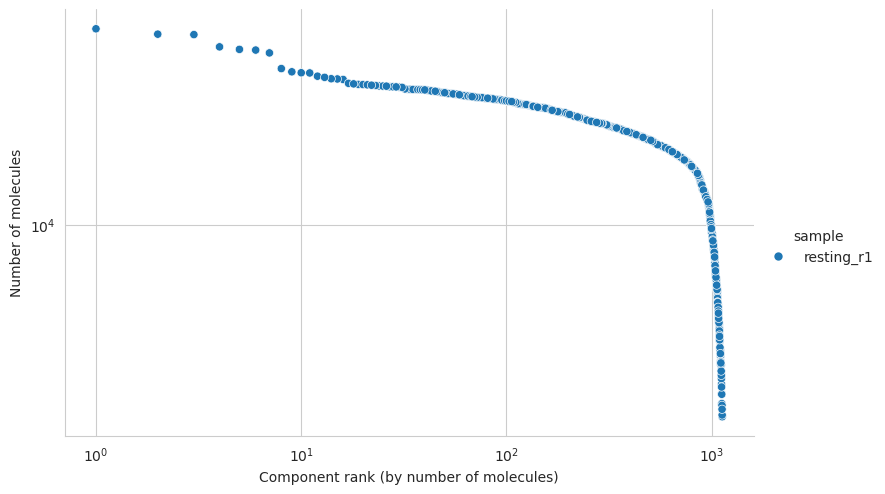

In [4]:
molecule_rank_df = adata.obs[["sample", "molecules"]].copy()
molecule_rank_df["rank"] = molecule_rank_df.groupby(["sample"])["molecules"].rank(
    ascending=False, method="first"
)
fig, ax = molecule_rank_plot(molecule_rank_df, group_by="sample")

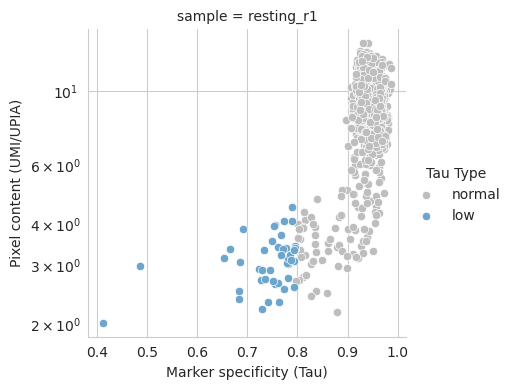

In [5]:
tau_metrics_df = adata.obs[["sample", "tau", "mean_molecules_per_a_pixel", "tau_type"]]
tau_metrics_df = tau_metrics_df.rename(columns={"mean_molecules_per_a_pixel": "umi_per_upia"})


fig, ax = scatter_umi_per_upia_vs_tau(tau_metrics_df, group_by="sample")

In [6]:
components_to_keep = adata[
    (adata.obs["molecules"] >= 10000)
    & (adata.obs["tau_type"] == "normal")
    & (adata.obs['a_pixels'] <= 10000)  # My change - removing a single outlier
].obs.index

pg_data = pg_data.filter(components=components_to_keep)
# os.remove(DATA_DIR/ "Sample06_V2_PBMC_r2.layout.dataset_FILTERED.pxl")
# pg_data.save(DATA_DIR/ "Sample06_V2_PBMC_r2.layout.dataset_FILTERED.pxl", force_overwrite=True)
adata = pg_data.adata

In [7]:
# Single outlier with extreme measures of a_pixel
print((adata.obs['a_pixels'] > 20000).sum())
adata.obs = adata.obs.drop(adata.obs[adata.obs['a_pixels'] > 20000].index)

0


True


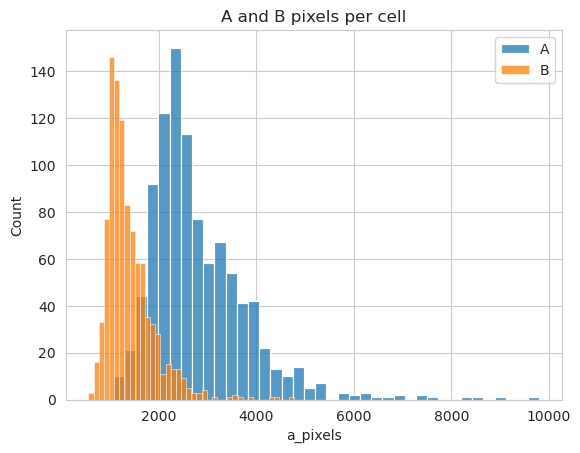

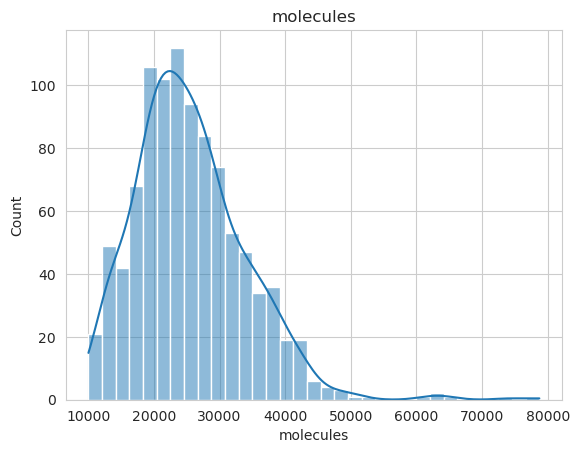

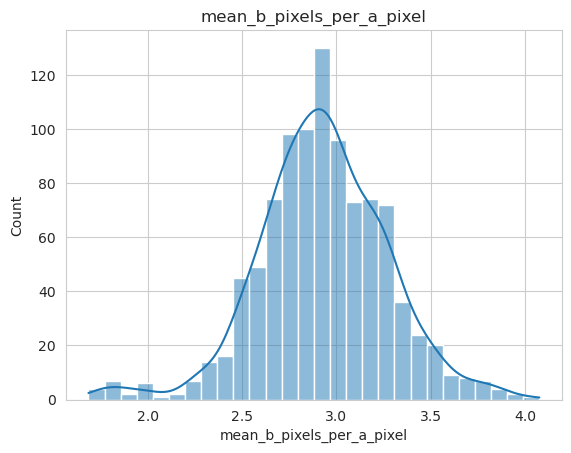

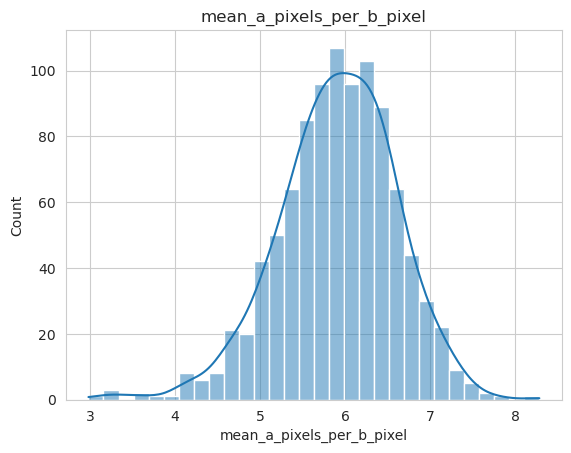

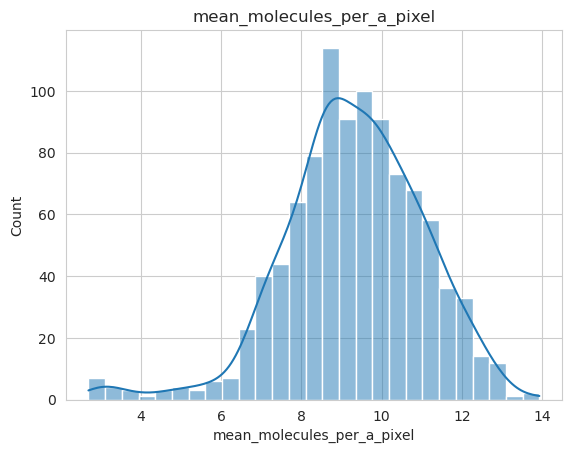

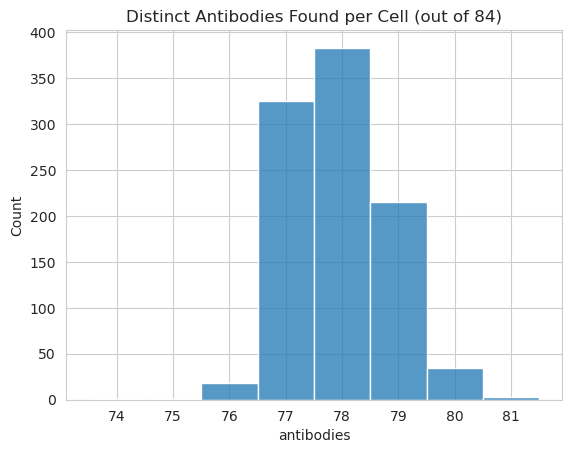

In [8]:
hist_vars = ['a_pixels', 'b_pixels', 'molecules', 'mean_b_pixels_per_a_pixel', 'mean_a_pixels_per_b_pixel', 'mean_molecules_per_a_pixel', 'antibodies']
print(all(adata.obs['pixels'] ==  adata.obs['a_pixels'] + adata.obs['b_pixels']))
for var in hist_vars:
    if var == 'b_pixels':
        continue
    fig, ax = plt.subplots(1)
    if var == 'a_pixels':
        sns.histplot(adata.obs['a_pixels'], ax=ax, label='A')
        sns.histplot(adata.obs['b_pixels'], ax=ax, label='B')
        ax.legend()
        ax.set_title('A and B pixels per cell')
        continue
    if var == 'antibodies':
        sns.histplot(adata.obs['antibodies'], ax=ax, discrete=True)
        ax.set_title('Distinct Antibodies Found per Cell (out of 84)')
        ax.set_xticks(list(range(adata.obs['antibodies'].min(), adata.obs['antibodies'].max() + 1)))
        continue
    sns.histplot(adata.obs[var], kde=True, ax=ax)
    ax.set_title(var)


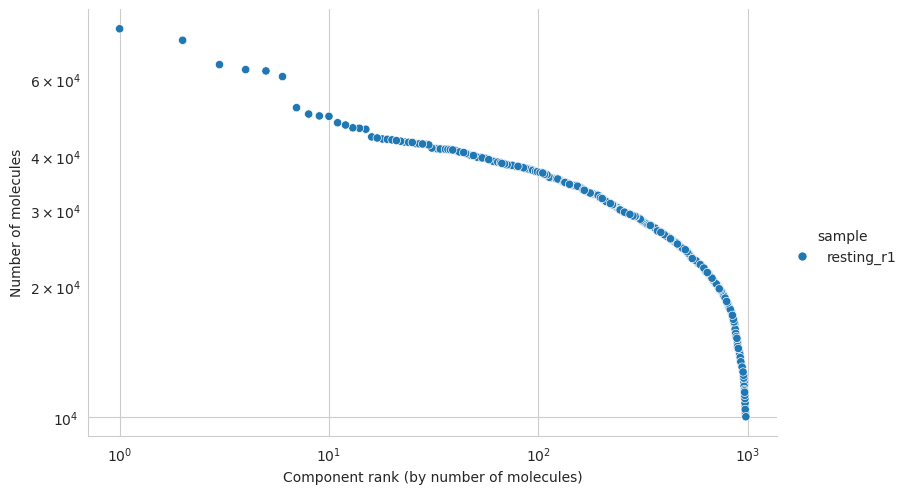

In [10]:
molecule_rank_df = adata.obs[['sample', 'molecules']].copy()
molecule_rank_df["rank"] = molecule_rank_df.groupby(["sample"])["molecules"].rank(
    ascending=False, method="first"
)
fig, ax = molecule_rank_plot(molecule_rank_df, group_by="sample")

<Axes: xlabel='a_pixels', ylabel='mean_b_pixels_per_a_pixel'>

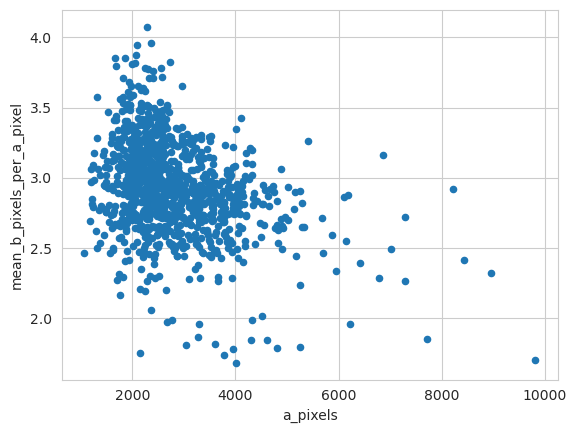

In [11]:
adata.obs = adata.obs.drop(adata.obs[adata.obs['a_pixels'] > 20000].index)
adata.obs.plot.scatter(x='a_pixels', y='mean_b_pixels_per_a_pixel')

In [12]:
antibody_variation_df = pg_data.adata.to_df().aggregate(['mean', 'std']).transpose()
antibody_variation_df['std/mean'] = antibody_variation_df['std'] / antibody_variation_df['mean']

Text(0.5, 1.0, 'Cells per antibody')

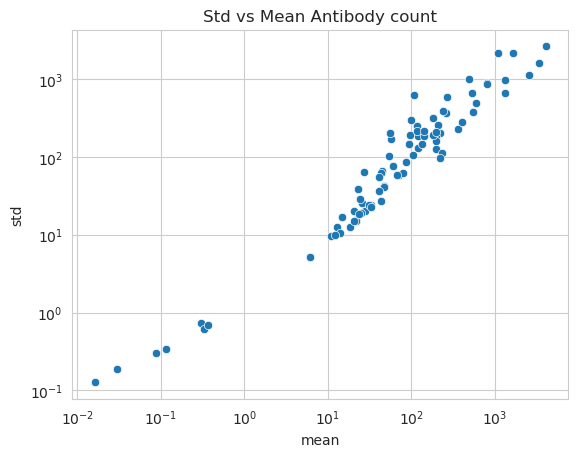

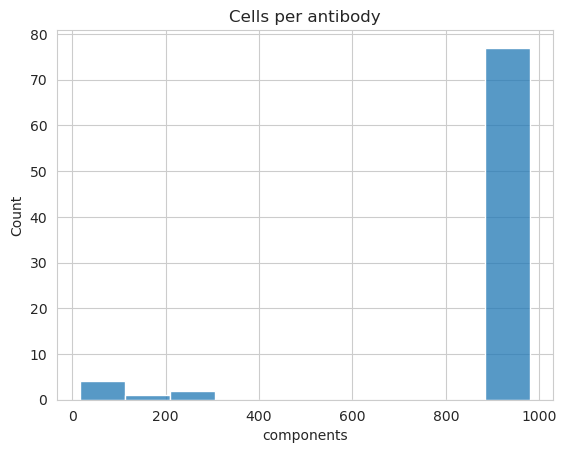

In [13]:
fig, ax = plt.subplots(1)
# sns.histplot(np.log10(adata.var['antibody_count']), ax=ax[0])
# ax[0].set_title('Log10 Total Antibody count')
sns.scatterplot(data=antibody_variation_df, x='mean', y='std')
ax.set_xscale('log')
ax.set_yscale('log')
# sns.histplot(np.log10(adata_df.mean(axis=0)), ax=ax)
ax.set_title('Std vs Mean Antibody count')

# fig, ax = plt.subplots(1)
# sns.histplot(np.log10(adata.var['components']), ax=ax, binwidth=0.25)
# ax.set_title('Log10 cells per antibody')

fig, ax = plt.subplots(1)
sns.histplot(adata.var['components'], ax=ax, binwidth=100)
ax.set_title('Cells per antibody')

# fig, ax = plt.subplots(1)
# antibody_variation = pg_data.adata.X.var(axis=0,)
# sns.histplot(np.log10(antibody_variation), ax=ax)
# ax.set_title('Log10 Antibody Count Variation (across cells)')

In [14]:
# antibody_variation_df.sort_values(by='mean', axis=0, ascending=False, inplace=True)
antibody_variation_df[antibody_variation_df['mean'] < 10].index

Index(['CD123', 'CD180', 'CD191', 'CD192', 'CD335', 'CD39', 'CD58', 'CD94'], dtype='object', name='marker')

In [15]:
# antibody_variation_df.sort_values(by='std', axis=0, ascending=False, inplace=True)
# # var(axis=0).sort_values(ascending=False)
# # antibody_variation_df['']
# print(antibody_variation_df.head(10))
# print(antibody_variation_df.tail(10))

# antibody_variation_df.sort_values(by='std/mean', axis=0, ascending=False, inplace=True)
# print(antibody_variation_df.head(10))
# print(antibody_variation_df.tail(10))



In [16]:
# sns.histplot(adata_df['CD24'])

Text(0.5, 1.0, 'Ab Pairs - Joint Cell Count (Abundance > 10)')

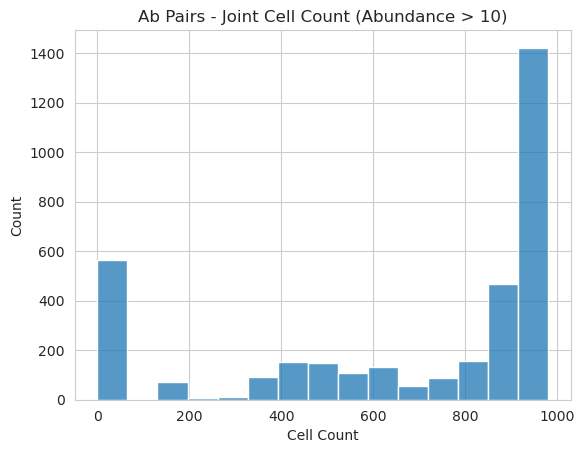

In [17]:
import itertools

adata_df = adata.to_df()
adata_corr = adata_df.corr()
n_antibodies = pg_data.adata.X.shape[1]
antibody_pairs_names = list(itertools.combinations(pg_data.adata.var_names, 2))
antibody_pair_count = pd.DataFrame(index=antibody_pairs_names, columns={'Cell Count': pd.Series(dtype=int), 'Corr': pd.Series(dtype=float)})
abundance_thresh = 10
for i, (ab_1, ab_2) in enumerate(antibody_pairs_names):
    name = (ab_1, ab_2)
    antibody_pair_count.at[name, 'Cell Count'] = len(adata_df[(adata_df[ab_1] > abundance_thresh) & (adata_df[ab_2] > abundance_thresh)])
    antibody_pair_count.at[name, 'Corr'] = adata_corr.loc[ab_1, ab_2]

# ax = sns.kdeplot(antibody_pair_count, x='Cell Count', y='Corr')
# ax.set_title('Ab Pairs - Correlation vs Joint Cell Count (Abundance > 10)')

ax = sns.histplot(antibody_pair_count['Cell Count'])
ax.set_title('Ab Pairs - Joint Cell Count (Abundance > 10)')

# protein_pair_count = pg_data.adata.X.copy()
# antibody_pair_count.sort_values(ascending=False).tail(10)


## Key takeaways
1. A large majority of antibodies are present in almost all cells. However some antibodies are present in very low quantities with a mean abundance of less than 10: 'CD123', 'CD94', 'CD192', 'CD335', 'CD58', 'CD39', 'CD191', 'CD180'
2. Most cells have 10K-40K antibodies sequenced
3. Antibody abundance variance grows with mean
4. Antibody pairs could be informative even without spatial information

In [18]:
# TODO: protein abundance cutoff 10K-50K
# TODO: PCA -> Cell types

In [19]:
print(adata.obsm['X_umap'].shape)

(981, 2)


<Axes: >

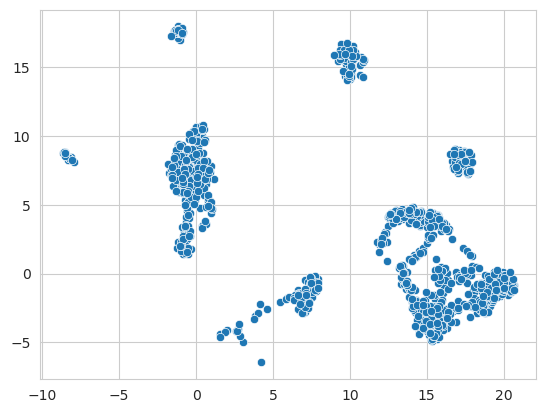

In [20]:
sns.scatterplot(x=adata.obsm['X_umap'][:, 0], y=adata.obsm['X_umap'][:, 1])

In [21]:
pg_data.edgelist.head(5)

,upia,upib,umi,marker,sequence,count,unique_molecules_count,component
0,CGGGTTAGTTCATAATTAGCCCATT,ATTGCAGGTCGTTAGACAGATAGTG,CGTCAGTGGG,CD19,ACCAACTT,15,1,RCVCMP0000000
1,CGTGATCAGACAACACGATGTGAGG,GCAGGGAACGACGGGTTTGCGTGGC,GAAGCGTCCT,CD19,ACCAACTT,15,1,RCVCMP0000001
2,CTTTTAGTGTTTTCTATATTTCTTA,CGTTTGTTTTCTGCGAAATTACTGC,TGCGAGGGGG,CD19,ACCAACTT,15,1,RCVCMP0000002
3,ACCCAGTTCTGCTCTGTCACGCAGT,GATGTGGAAATCTAATATGTATACC,GAGTTTGGGA,CD19,ACCAACTT,14,1,RCVCMP0000004
4,TTGGTGTACTTCATTCTGTCGGGTC,AGCGGGGAGCTTGCGGTTTGTACAT,TAGTGGACCA,CD19,ACCAACTT,14,1,RCVCMP0000005
